In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='ovr', solver='liblinear'))
])


In [28]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create cross-validation object
grid = {
    'logreg__C': np.logspace(-4, 10, num=100)
}
grid_cv = GridSearchCV(pipe, grid, cv=5, return_train_score=True, verbose=1, n_jobs=-1)


In [29]:
from sklearn import datasets

# Load data set
iris = datasets.load_iris()

# Create X/y arrays
X = iris['data']
y = iris['target']

# Fit estimator
grid_cv.fit(X, y)

# Get the results with "cv_results_"
grid_cv.cv_results_.keys()
# Returns: dict_keys(['mean_fit_time', 'std_fit_time','mean_score_time', ...


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [30]:
import pandas as pd

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C']
cv_results[cols].sort_values('mean_test_score', ascending=False).head(3)


,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C
50,0.96,0.024944,0.975000,0.010541,1176.81
75,0.96,0.024944,0.976667,0.013333,4.03702e+06
73,0.96,0.024944,0.976667,0.013333,2.1049e+06


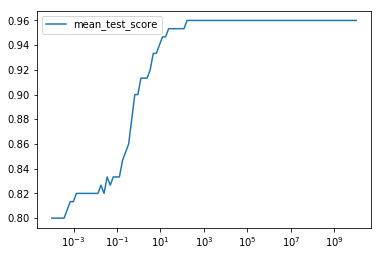

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot test curve
plt.semilogx(cv_results['param_logreg__C'], cv_results['mean_test_score'])
plt.legend()
plt.show()


In [33]:
grid_cv.score(X,y)

0.9666666666666667

In [34]:
from sklearn.linear_model import LogisticRegressionCV

# Create estimator
logreg_cv = LogisticRegressionCV(
    Cs=[0.1, 1, 10], cv=5, multi_class='ovr', solver='liblinear')


In [35]:
from sklearn.preprocessing import scale

# Fit the estimator
logreg_cv.fit(scale(X), y);


In [37]:
# Scores for class 1 (Setosa)
logreg_cv.scores_


{0: array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 1: array([[0.66666667, 0.66666667, 0.63333333],
        [0.7       , 0.7       , 0.7       ],
        [0.66666667, 0.76666667, 0.73333333],
        [0.8       , 0.76666667, 0.76666667],
        [0.73333333, 0.76666667, 0.76666667]]),
 2: array([[0.76666667, 0.9       , 1.        ],
        [0.93333333, 0.96666667, 1.        ],
        [0.83333333, 0.93333333, 0.93333333],
        [0.9       , 0.9       , 0.93333333],
        [1.        , 1.        , 1.        ]])}